In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
df = pd.read_excel('titanic.xls')

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


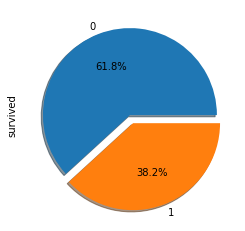

In [5]:
df["survived"].value_counts().plot.pie( explode=[0,0.1], autopct='%1.1f%%', shadow=True)
plt.show()

In [6]:
#Male's survival rate
len(df.loc[ (df["sex"]=='male') & (df["survived"]==1)]) / len(df.loc[ (df["sex"]=='male') ]) 

0.19098457888493475

In [7]:
#Female's survival rate
len(df.loc[ (df["sex"]=='female') & (df["survived"]==1)]) / len(df.loc[ (df["sex"]=='female') ]) 

0.7274678111587983

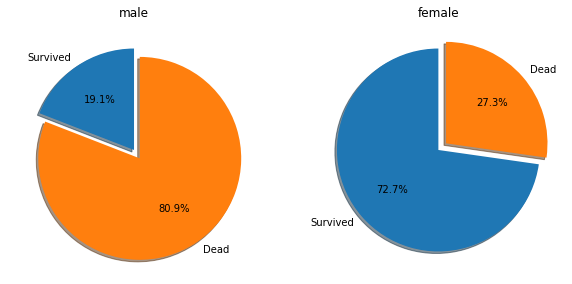

In [8]:
labels = 'Survived', 'Dead'
sizes_male = [len(df.loc[ (df["sex"]=='male') & (df["survived"]==1)]), \
         len(df.loc[ (df["sex"]=='male')& (df["survived"]==0)]) ]
sizes_female = [len(df.loc[ (df["sex"]=='female') & (df["survived"]==1)]), \
         len(df.loc[ (df["sex"]=='female')& (df["survived"]==0)]) ]

explode = (0, 0.1) 

fig = plt.figure()
fig.set_size_inches(10,5)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(sizes_male, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('male')

ax2.pie(sizes_female, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.set_title('female')

plt.show()

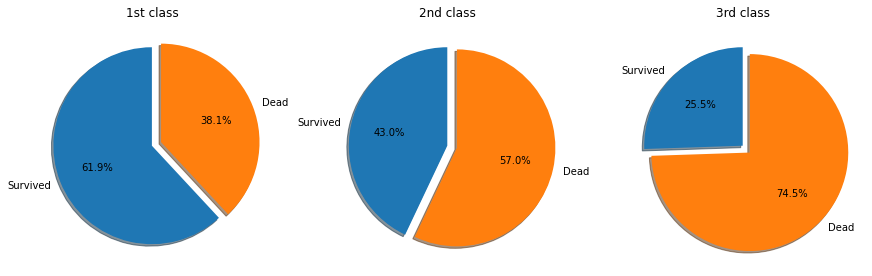

In [9]:
labels = 'Survived', 'Dead'
sizes_1 = [len(df.loc[ (df["pclass"]==1) & (df["survived"]==1)]), \
         len(df.loc[ (df["pclass"]==1)& (df["survived"]==0)]) ]

sizes_2 = [len(df.loc[ (df["pclass"]==2) & (df["survived"]==1)]), \
         len(df.loc[ (df["pclass"]==2)& (df["survived"]==0)]) ]

sizes_3 = [len(df.loc[ (df["pclass"]==3) & (df["survived"]==1)]), \
         len(df.loc[ (df["pclass"]==3)& (df["survived"]==0)]) ]

explode = (0, 0.1)

fig = plt.figure()
fig.set_size_inches(15,5)
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.pie(sizes_1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('1st class')

ax2.pie(sizes_2, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.set_title('2nd class')

ax3.pie(sizes_3, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax3.set_title('3rd class')

plt.show()

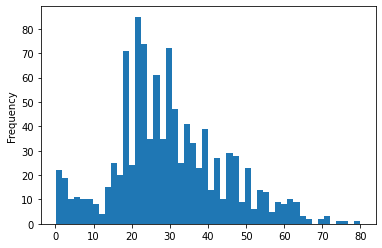

In [10]:
df["age"].plot.hist(bins=50)
plt.show()

In [23]:
df["age"].fillna( df.groupby(["pclass", "sex"])["age"].transform("mean") , inplace = True)

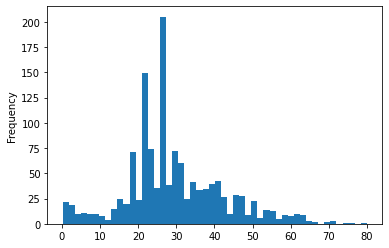

In [24]:
df["age"].plot.hist(bins=50)
plt.show()

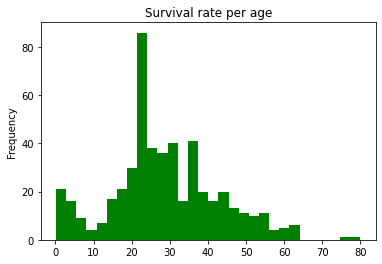

In [25]:
df[df["survived"]==1]["age"].plot.hist(bins=30, color='g')
plt.title('Survival rate per age')
plt.show()

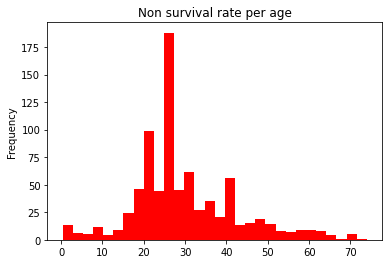

In [26]:
df[df["survived"]==0]["age"].plot.hist(bins=30, color='r')
plt.title('Non survival rate per age')
plt.show()